In [38]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the files
current_emp_to_load = "Data/current_emp_title.csv"
mentorship_to_load = "Data/mentorship_count.csv"
retirement_titles_to_load = "Data/retiring_titles.csv"

# Read the files
current_emp_df = pd.read_csv(current_emp_to_load)
mentorship_eligibility_df = pd.read_csv(mentorship_to_load)
retirement_titles_df = pd.read_csv(retirement_titles_to_load)

In [39]:
# Read current emp file
current_emp_df["Status"] = "Active"
current_emp_df

,count,title,Status
0,12057,Assistant Engineer,Active
1,84467,Engineer,Active
2,24,Manager,Active
3,23986,Senior Engineer,Active
4,82022,Senior Staff,Active
5,25520,Staff,Active
6,12048,Technique Leader,Active


In [40]:
# Read mentorship file (to_date of 9999-01-01 indicates current employee)
mentorship_eligibility_df["Status"] = "Eligible for Mentorship"
mentorship_eligibility_df

,count,title,Status
0,569,Senior Staff,Eligible for Mentorship
1,501,Engineer,Eligible for Mentorship
2,169,Senior Engineer,Eligible for Mentorship
3,155,Staff,Eligible for Mentorship
4,78,Assistant Engineer,Eligible for Mentorship
5,77,Technique Leader,Eligible for Mentorship


In [41]:
# Read retirement by titles info
retirement_titles_df["Status"] = "Eligible for Retirement"
retirement_titles_df

,count,title,Status
0,29414,Senior Engineer,Eligible for Retirement
1,28254,Senior Staff,Eligible for Retirement
2,14222,Engineer,Eligible for Retirement
3,12243,Staff,Eligible for Retirement
4,4502,Technique Leader,Eligible for Retirement
5,1761,Assistant Engineer,Eligible for Retirement
6,2,Manager,Eligible for Retirement


In [48]:
# Get current employees properly grouped by
current_emp = current_emp_df.sort_values('title')
current_emp

,count,title,Status
0,12057,Assistant Engineer,Active
1,84467,Engineer,Active
2,24,Manager,Active
3,23986,Senior Engineer,Active
4,82022,Senior Staff,Active
5,25520,Staff,Active
6,12048,Technique Leader,Active


In [46]:
# Get number of employees eligible for mentorship grouped by
mentor_eligible = mentorship_eligibility_df.sort_values('title')
mentor_eligible

,count,title,Status
4,78,Assistant Engineer,Eligible for Mentorship
1,501,Engineer,Eligible for Mentorship
2,169,Senior Engineer,Eligible for Mentorship
0,569,Senior Staff,Eligible for Mentorship
3,155,Staff,Eligible for Mentorship
5,77,Technique Leader,Eligible for Mentorship


In [47]:
retiring = retirement_titles_df.sort_values('title')
retiring

,count,title,Status
5,1761,Assistant Engineer,Eligible for Retirement
2,14222,Engineer,Eligible for Retirement
6,2,Manager,Eligible for Retirement
0,29414,Senior Engineer,Eligible for Retirement
1,28254,Senior Staff,Eligible for Retirement
3,12243,Staff,Eligible for Retirement
4,4502,Technique Leader,Eligible for Retirement


In [49]:
combined_df = pd.concat([current_emp, retiring, mentor_eligible])
combined_df

,count,title,Status
0,12057,Assistant Engineer,Active
1,84467,Engineer,Active
2,24,Manager,Active
3,23986,Senior Engineer,Active
4,82022,Senior Staff,Active
5,25520,Staff,Active
6,12048,Technique Leader,Active
5,1761,Assistant Engineer,Eligible for Retirement
2,14222,Engineer,Eligible for Retirement
6,2,Manager,Eligible for Retirement


In [57]:
# Set style for Seaborn plot
sns.set(style="whitegrid", font="Arial")
# Create a color palette for the graph
pal = sns.color_palette('pastel')

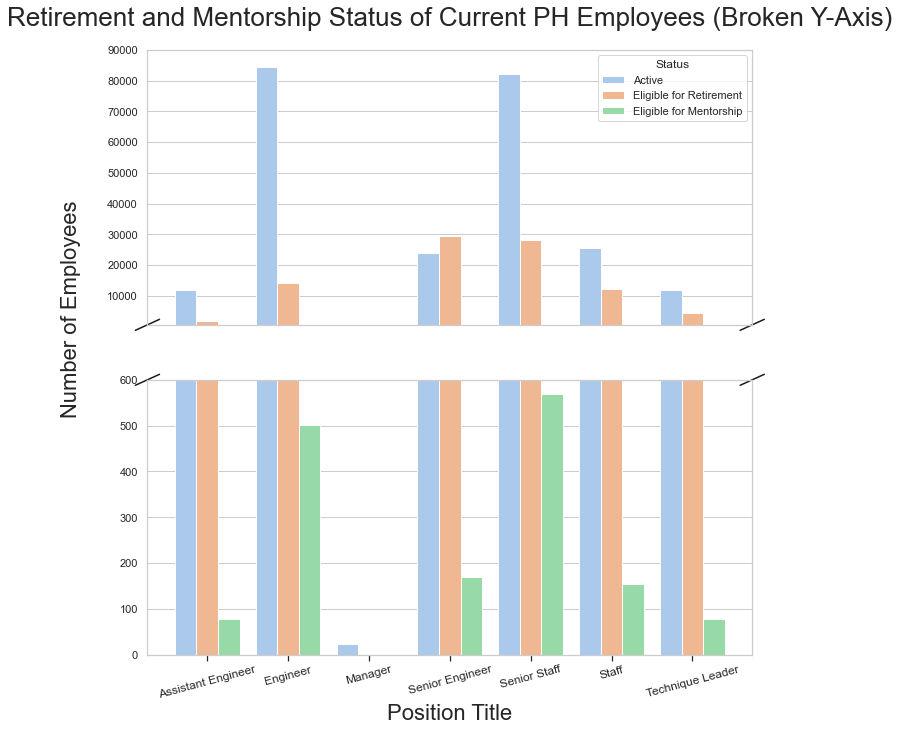

In [64]:
# Create a split graph to capture all of the data within its limits
# This is especially useful for graphing positions such as manager, assistant engineer, and technique leader
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(12,12))

# Create bargraph with job title on the x axis and employee count on the y
# Adjust palette and define subplot
ax1 = sns.barplot(x='title', y='count',
                  hue='Status', data=combined_df, palette=pal, ax=ax1)

# Repeat on lower plot
ax2 = sns.barplot(x='title', y='count',
                  hue='Status', data=combined_df, palette=pal, ax=ax2)
# Set the x axis label
ax2.set_xlabel("Position Title", fontsize=22)
# Add title above top graph
ax1.set_title("Retirement and Mentorship Status of Current PH Employees (Broken Y-Axis)", fontsize=26, pad=24)
plt.xticks(rotation=15, fontsize=12)
# Set limits for uper and lower graphs 
ax1.set_ylim(600, 90000)
ax2.set_ylim(0, 600)

# Remove upper axis as it is not needed 
ax1.get_xaxis().set_visible(False)

# Remove y labels from both graphs 
ax1.set_ylabel("")
ax2.set_ylabel("")
# Create a new label for the y axis that is centered between the two graphs
fig.text(0.05, 0.55, 'Number of Employees', va='center', rotation='vertical', fontsize=22)

# Add legend to the upper graph and remove from the lower
ax1.get_legend()
ax2.get_legend().remove()

# Add ticks to the top of the upper graph and bottom of the lower graph 
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Format the style
fig.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

# Add hash marks were the plot breaks
d = .02 

# Create hash marks on upper axis
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# Create the top-left diagonal
ax1.plot((-d, +d), (-d, +d), **kwargs) 
# Create the top-right diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

# Add hash marks to the bottom axes
kwargs.update(transform=ax2.transAxes)
# Create the bottom-left diagonal
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
# Create bottom-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

plt.show()

# Split Graph created based on github repo https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e